In [40]:
import torch
from torch.quantization import fuse_modules

In [50]:
from models.tinyyolov2 import TinyYoloV2PersonOnly, TinyYoloV2Original

In [52]:
model = TinyYoloV2Original()
model.load_state_dict(torch.load("data/voc_pretrained.pt"), strict=False)
model.eval()

TinyYoloV2Original(
  (loss): YoloLoss(
    (mse): MSELoss()
    (cel): CrossEntropyLoss()
  )
  (pad): ReflectionPad2d((0, 1, 0, 1))
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn5): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True

In [54]:
modules = [name for name, _ in model.named_modules()][5:-1]
modules_to_fuse = [modules[i:i+2] for i in range(0,len(modules),2)]
print(modules_to_fuse)
fuse_modules(model, modules_to_fuse, inplace=True)

[['conv1', 'bn1'], ['conv2', 'bn2'], ['conv3', 'bn3'], ['conv4', 'bn4'], ['conv5', 'bn5'], ['conv6', 'bn6'], ['conv7', 'bn7'], ['conv8', 'bn8']]


TinyYoloV2Original(
  (loss): YoloLoss(
    (mse): MSELoss()
    (cel): CrossEntropyLoss()
  )
  (pad): ReflectionPad2d((0, 1, 0, 1))
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): Identity()
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): Identity()
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): Identity()
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn4): Identity()
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn5): Identity()
  (conv6): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn6): Identity()
  (conv7): Conv2d(512, 1024, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn7): Identity()
  (conv8): Conv2d(1024, 1024, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn8): Identity()
  (conv9): Conv2d(1024, 125, kernel_size=(1, 1), stride=(1, 1))
)

In [55]:
model

TinyYoloV2Original(
  (loss): YoloLoss(
    (mse): MSELoss()
    (cel): CrossEntropyLoss()
  )
  (pad): ReflectionPad2d((0, 1, 0, 1))
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): Identity()
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): Identity()
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): Identity()
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn4): Identity()
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn5): Identity()
  (conv6): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn6): Identity()
  (conv7): Conv2d(512, 1024, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn7): Identity()
  (conv8): Conv2d(1024, 1024, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn8): Identity()
  (conv9): Conv2d(1024, 125, kernel_size=(1, 1), stride=(1, 1))
)

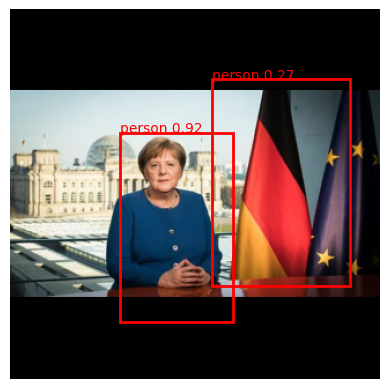

In [45]:
# predict on custom image
from PIL import Image
import torchvision.transforms.functional as tf
from utils.dataloader import image_transform
from utils.viz import plot_predictions

image = Image.open('data/merkel.jpg')
image = image_transform(image)[0]
image = tf.to_tensor(image)
image = torch.unsqueeze(image, 0)

with torch.no_grad():
    predictions = model(image)
    plot_predictions(predictions, image, person_only=True)

In [46]:
torch.save(model.state_dict(), "data/person_only_fused.pt")

In [47]:
test_model = TinyYoloV2PersonOnly()
test_model.load_state_dict(torch.load("data/person_only_fused.pt"), strict=False)
test_model.eval()

TinyYoloV2PersonOnly(
  (loss): YoloLoss(
    (mse): MSELoss()
    (cel): CrossEntropyLoss()
  )
  (pad): ReflectionPad2d((0, 1, 0, 1))
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn5): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=Tr